# Iphone Purchase Prediction Using Classification Machine Learning

## 1. Introduction 

### This project aims to predict whether a person will purchase an iPhone based on independent variables such as gender, age, and salary, with the dependent variable being the iPhone purchase decision. The project follows a structured machine learning pipeline that includes loading the dataset, Preprocessing the dataset, training various models, and evaluating their performance. To achieve accurate and reliable results, different types of machine learning algorithms will be applied, including Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Decision Tree Classifier (DTC). Through this approach, the project seeks to determine the most effective model for predicting consumer behavior in relation to iPhone purchases.


## 2. Importing Libraries

In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 3. Load The Iphone_purchase Dataset

In [223]:
iphones = pd.read_csv(r"Downloads\\Iphone Purchase.csv")
iphones.head(5)

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


## 4. Preprocessing the dataset

### 4.1 Gender Column

In [224]:
# mapping the gender Columns to be Male = 1 and Female = 0
iphones['Gender'] = iphones['Gender'].map({'Male':1, 'Female':0})

In [225]:
# Fill NaN values in 'Gender' with the mode of the column
gender_mode = round(iphones['Gender'].mode() [0])
iphones['Gender'] = iphones['Gender'].fillna(gender_mode) 

In [226]:
#convert The Data type of the Gender column into Integer
iphones['Gender'] = iphones['Gender'].astype('int64')

### 4.2 Age Column

In [227]:
# Convert all values in the 'Age' column to numeric
iphones['Age'] = pd.to_numeric(iphones['Age'], errors='coerce')

In [228]:
# Fill NaN values in 'Age' with the mean of the column
age_mean = round(iphones['Age'].mean())
iphones['Age'] = iphones['Age'].fillna(age_mean)

In [229]:
#convert The Data type of the Age column into Integer
iphones['Age'] = iphones['Age'].astype('int64')

### 4.3 Salary Column

In [230]:
# Convert all values in the 'Salary' column to numeric
iphones['Salary'] = pd.to_numeric(iphones['Salary'], errors='coerce')

In [231]:
# Fill NaN values in 'Salary' with the mean of the column
salary_mean = round( iphones['Salary'].mean())
iphones['Salary'] = iphones['Salary'].fillna(age_mean)

In [232]:
#convert The Data type of the Salary column into float
iphones['Salary'] = iphones['Salary'].astype('float64')

### 4.4 Checking Nulls In the dataset

In [233]:
iphones.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

### 4.5 Infomarion About the datset

In [234]:
iphones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    int64  
 1   Age              400 non-null    int64  
 2   Salary           400 non-null    float64
 3   Purchase Iphone  400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


### 4.5 Statistical Summary

In [235]:
iphones.describe()

,Gender,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000,400.000000
mean,0.485000,37.617500,69532.690000,0.357500
std,0.500401,10.467575,34366.410257,0.479864
min,0.000000,18.000000,38.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


## 5. Select variables  

In [236]:
x = iphones[['Gender', 'Age', 'Salary']]
y = iphones['Purchase Iphone']

## 6. Spliting the dataset into Training And Testing dataset, and  train size= 80%

In [237]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size =.8)

## 7.   Fitting Machine Learning Models

### 7.1 Support Vector Machine(SVM)

In [238]:
from sklearn.svm import SVC
SVM = SVC(kernel='rbf')
SVM.fit(x_train, y_train)

SVC()

### 7.2 K-Nearest Neighbors(KNN)

In [239]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier( n_neighbors = 18)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=18)

### 7.3 Decision Tree Classifier(DTC)

In [240]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy')
DTC.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

## 8. Make Predictions 

In [244]:
SVM_prediction = SVM.predict(x_test)
KNN_prediction = KNN.predict(x_test)
DTC_prediction = DTC.predict(x_test)

## 9. Evaluating the model perfomance using Accuracy Score

In [247]:
from sklearn.metrics import accuracy_score
SVM_accuracy_score = accuracy_score(y_test, SVM_prediction)
KNN_accuracy_score = accuracy_score(y_test, KNN_prediction)
DTC_accuracy_score = accuracy_score(y_test, DTC_prediction)
print('The Support Vector Machine Accuracy Score is:', SVM_accuracy_score)
print('The K-Nearest Neighbors Accuracy Score is:', KNN_accuracy_score)
print('The Decision Tree Classifie Accuracy Score is:', DTC_accuracy_score)

The Support Vector Machine Accuracy Score is: 0.7875
The K-Nearest Neighbors Accuracy Score is: 0.8375
The Decision Tree Classifie Accuracy Score is: 0.9125


## 10. A histogram is plotted using the predicted values to visualize the distribution of the model’s predictions.

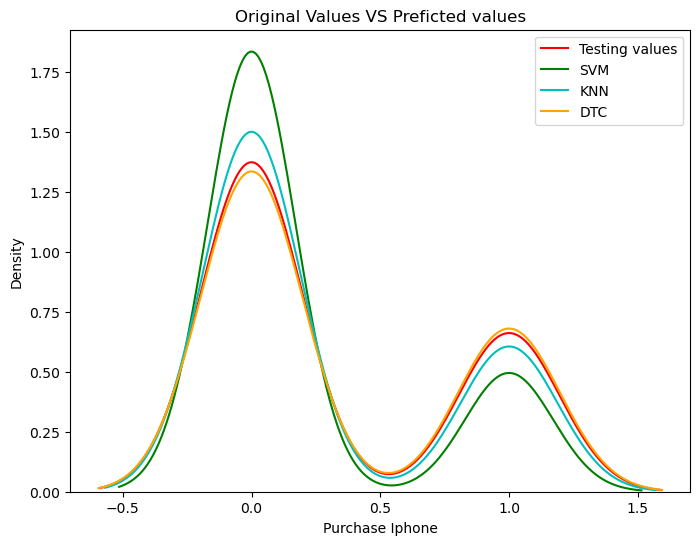

In [252]:
plt.figure(figsize=(8,6))
sns.kdeplot(y_test, label='Testing values', color='r')
sns.kdeplot(SVM_prediction, label='SVM', color='green')
sns.kdeplot(KNN_prediction, label='KNN', color='c')
sns.kdeplot(DTC_prediction, label='DTC', color='orange')
plt.title('Original Values VS Preficted values')
plt.legend()

## 11. Conclusion

### The iPhone Purchase project demonstrates the practical application of machine learning techniques to predict whether an individual is likely to purchase an iPhone based on key demographic features such as age, gender, and salary. Various classification algorithms were implemented, including Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Decision Tree Classifier (DTC). Among these models, the Decision Tree Classifier achieved the highest accuracy of 90%, followed by K-Nearest Neighbors with 83%, and Support Vector Machine with 78%. These results indicate that the Decision Tree Classifier is the most effective model for this particular dataset

## 12. Future Work

### Future improvements to the project could include incorporating additional features such as occupation, education level, or location to enhance model performance. Furthermore, techniques such as hyperparameter tuning, cross-validation, and ensemble methods like Random Forest or Gradient Boosting could be applied to achieve even higher predictive accuracy. Expanding the dataset and addressing class imbalance, if present, may also contribute to more robust and generalizable models